In [5]:
import pandas as pd
import numpy as np

In [6]:
score_dict = {'수학':60, '컴퓨터':80, '체육':20, '과학':40}

score_sr = pd.Series(score_dict)

In [7]:
score_sr.values
#score_sr.index

array([60, 80, 20, 40], dtype=int64)

In [8]:
#컴퓨터부터 슬라이싱
score_sr['컴퓨터':]

컴퓨터    80
체육     20
과학     40
dtype: int64

In [9]:
student_1 = {'국어': 40,'수학':90,'영어':30,'과학':90}
student_2 = {'국어':90, '수학':80, '영어':100, '사회':70}

In [10]:
index_1 = ['홍길동' for i in range(len(student_1))] + ['이몽룡' for i in range(len(student_2))]

In [11]:
index_2 = [key for key in student_1] + [key for key in student_2]

In [12]:
values = list(student_1.values()) + list(student_2.values())

In [13]:
scores_sr = pd.Series(values, index=[index_1, index_2])

In [14]:
scores_sr['홍길동']['국어']

40

In [15]:
scores_sr[('홍길동','국어')]

40

In [16]:
scores_sr.index

MultiIndex([('홍길동', '국어'),
            ('홍길동', '수학'),
            ('홍길동', '영어'),
            ('홍길동', '과학'),
            ('이몽룡', '국어'),
            ('이몽룡', '수학'),
            ('이몽룡', '영어'),
            ('이몽룡', '사회')],
           )

In [17]:
# 결측값 처리
x = [1,None, 2, None, 3, 4, None]
x_sr = pd.Series(x)

In [18]:
x_sr

0    1.0
1    NaN
2    2.0
3    NaN
4    3.0
5    4.0
6    NaN
dtype: float64

In [19]:
type(x_sr[1])

numpy.float64

In [20]:
type(np.nan)

float

In [21]:
type(x_sr[1])

numpy.float64

In [22]:
#결측값 개수 확인.
x_sr.isnull().sum()

3

In [23]:
#원본에 적용할 필요가 있을 때
x_sr.fillna(0, inplace=True)

In [24]:
x_sr

0    1.0
1    0.0
2    2.0
3    0.0
4    3.0
5    4.0
6    0.0
dtype: float64

In [25]:
x = pd.Series([1,2,3])
y = pd.Series([4,5,6])
z = pd.Series([7,8,9])

In [26]:
#오류 발생 : verify_integrity
pd.concat([x,y,z], ignore_index=True, axis=1)

,0,1,2
0,1,4,7
1,2,5,8
2,3,6,9


In [27]:
pd.concat([x, y, z], ignore_index=True, axis=1, join='inner')

,0,1,2
0,1,4,7
1,2,5,8
2,3,6,9


In [28]:
sales_data = {
'연도':[2015, 2016, 2017, 2018, 2019, 2020], 
'판매량':[103, 70, 130, 160, 190, 230],
'매출':[500000, 300000, 400000, 550000, 700000, 680000], 
'순이익':[370000, 190000, 300000, 480000, 600000, 590000] 
}

In [29]:
sales_df = pd.DataFrame(sales_data)

In [30]:
sales_df['순이익률'] = [0 for i in range(len(sales_df))]

In [31]:
sales_df['순이익률'] = (sales_df['순이익'] / sales_df['매출'])*100

In [32]:
sales_df

,연도,판매량,매출,순이익,순이익률
0,2015,103,500000,370000,74.000000
1,2016,70,300000,190000,63.333333
2,2017,130,400000,300000,75.000000
3,2018,160,550000,480000,87.272727
4,2019,190,700000,600000,85.714286
5,2020,230,680000,590000,86.764706


In [33]:
def check(n):
    if n >80:
        return '높음'
    else:
        return '낮음'

In [35]:
sales_df['순이익률_비교'] = sales_df['순이익률'].apply(check)
sales_df

,연도,판매량,매출,순이익,순이익률,순이익률_비교
0,2015,103,500000,370000,74.000000,낮음
1,2016,70,300000,190000,63.333333,낮음
2,2017,130,400000,300000,75.000000,낮음
3,2018,160,550000,480000,87.272727,높음
4,2019,190,700000,600000,85.714286,높음
5,2020,230,680000,590000,86.764706,높음


In [80]:
sales_df[sales_df['매출']>300000]

,연도,판매량,매출,순이익
0,2015,103,500000,370000
2,2017,130,400000,300000
3,2018,160,550000,480000
4,2019,190,700000,600000
5,2020,230,680000,590000


In [82]:
#true일시 0, False일시 판매량
np.where(sales_df['판매량']>200, 0, sales_df['판매량'])

array([103,  70, 130, 160, 190,   0], dtype=int64)

In [86]:
sales_df[sales_df['판매량'] < 100]['판매량'] + 50

1    120
Name: 판매량, dtype: int64

In [90]:
sales_df.loc[6]=[2022,320,680100,591000]

In [92]:
sales_df

,연도,판매량,매출,순이익
0,2015,103,500000,370000
1,2016,70,300000,190000
2,2017,130,400000,300000
3,2018,160,550000,480000
4,2019,190,700000,600000
5,2020,230,680000,590000
6,2022,320,680100,591000


In [37]:
sales_df['테스트1'] = '테스트1'
sales_df['테스트2'] = '테스트2'
sales_df['테스트3'] = '테스트3'

In [38]:
#테스트1 항목 삭제
del sales_df['테스트1']

In [39]:
sales_df.drop(['테스트2'], axis='columns', inplace=True)

In [64]:
# index=None은 index 날리기
sales_df.to_csv('./sales_data.csv', index=None, encoding='utf-8')

In [66]:
pd.read_csv('./sales_data.csv')

,연도,판매량,매출,순이익
0,2015,103,500000,370000
1,2016,70,300000,190000
2,2017,130,400000,300000
3,2018,160,550000,480000
4,2019,190,700000,600000
5,2020,230,680000,590000


In [57]:
#인덱스로 접근
sales_df.iloc[1]

연도       2016
판매량        70
매출     300000
순이익    190000
Name: 1, dtype: int64

In [58]:
sales_df = pd.DataFrame(sales_data, columns=['판매량', '매출', '순이익'], index=sales_data['연도'])

In [59]:
sales_df

,판매량,매출,순이익
2015,103,500000,370000
2016,70,300000,190000
2017,130,400000,300000
2018,160,550000,480000
2019,190,700000,600000
2020,230,680000,590000


In [107]:
df = pd.DataFrame(np.random.randint(1, 100, size=(4, 4)),
             index = [ ['AA', 'AA', 'BB', 'BB'], ['a', 'b', 'a', 'b']],
             columns=[['가가', '가가', '나나', '나나'],['가', '나', '가', '나']])

In [108]:
df['가가']['가']

AA  a    77
    b    29
BB  a    38
    b    23
Name: 가, dtype: int32

In [109]:
df.loc['AA'].loc['a']

가가  가    77
    나    70
나나  가    61
    나    27
Name: a, dtype: int32

In [112]:
df = pd.DataFrame(np.random.randint(1, 100, size=(8, 2)), 
index=[['A창고','A창고','A창고','A창고','B창고','B창고','B창고','B창고'], 
        ['사과','배','바나나','사과','사과','배','바나나','배']],
columns=['판매','재고'])
         
df

판매  재고
A창고 사과   85  95
    배    62  83
    바나나  50  85
    사과    9  83
B창고 사과    2  49
    배    29  62
    바나나  76  87
    배    60  67

In [113]:
df.index.names = ['창고명','상품명']
df

판매  재고
창고명 상품명        
A창고 사과   85  95
    배    62  83
    바나나  50  85
    사과    9  83
B창고 사과    2  49
    배    29  62
    바나나  76  87
    배    60  67

In [115]:
df.groupby('창고명').sum()

,판매,재고
창고명,,
A창고,206,346
B창고,167,265


In [116]:
df.groupby('상품명').sum()

,판매,재고
상품명,,
바나나,126,172
배,151,212
사과,96,227


### 실습1

In [117]:
x = [np.nan,1,2,3,4,5]
y = pd.Series([x[np.random.randint(0,6)] for i in range(20)])

In [122]:
# 1. 결측값의 개수를 구하고
y.isnull().sum()

3

In [123]:
#2. 결측값을 제거한 series를 만들고
y.dropna()

0     3.0
1     3.0
2     5.0
3     1.0
4     2.0
6     2.0
7     4.0
8     5.0
9     5.0
10    5.0
11    2.0
13    2.0
15    2.0
16    2.0
17    4.0
18    1.0
19    2.0
dtype: float64

In [125]:
# 3. 결측값에 y의 평균값을 넣은 Series를 만들어주세요.

In [126]:
y.mean()

2.9411764705882355

In [127]:
y.fillna(y.mean())

0     3.000000
1     3.000000
2     5.000000
3     1.000000
4     2.000000
5     2.941176
6     2.000000
7     4.000000
8     5.000000
9     5.000000
10    5.000000
11    2.000000
12    2.941176
13    2.000000
14    2.941176
15    2.000000
16    2.000000
17    4.000000
18    1.000000
19    2.000000
dtype: float64

In [128]:
#실습2

In [135]:
index_1 = ['1학년']*5+['2학년']*5 +['3학년'] * 5
index_2 = [str(i)+'반' for i in range(1, 6)] * 3

columns = ['국어', '영어', '과학']

values = np.random.randint(1, 100, size=(15, 3))

school_df = pd.DataFrame(values, index=[index_1, index_2], columns=columns)

In [137]:
school_df

국어  영어  과학
1학년 1반   5  87  62
    2반  99  34  62
    3반   2  43  53
    4반  46  94  25
    5반  36  20  47
2학년 1반  25  52   3
    2반  59  86  11
    3반  79  49  88
    4반  79  37  99
    5반  75  83  11
3학년 1반  23  28  56
    2반  55  45  58
    3반  44  77  70
    4반  17  99  65
    5반  88  89  67

In [ ]:
# 반별 합계와 평균을 추가.

In [138]:
school_df['총점'] = school_df['국어'] + school_df['영어'] + school_df['과학']

In [140]:
school_df['평균'] = school_df['총점'] / 3

In [141]:
school_df

국어  영어  과학   총점         평균
1학년 1반   5  87  62  154  51.333333
    2반  99  34  62  195  65.000000
    3반   2  43  53   98  32.666667
    4반  46  94  25  165  55.000000
    5반  36  20  47  103  34.333333
2학년 1반  25  52   3   80  26.666667
    2반  59  86  11  156  52.000000
    3반  79  49  88  216  72.000000
    4반  79  37  99  215  71.666667
    5반  75  83  11  169  56.333333
3학년 1반  23  28  56  107  35.666667
    2반  55  45  58  158  52.666667
    3반  44  77  70  191  63.666667
    4반  17  99  65  181  60.333333
    5반  88  89  67  244  81.333333

In [142]:
school_df.index.names = ['학년','반']

In [145]:
school_df.groupby('학년').sum()

,국어,영어,과학,총점,평균
학년,,,,,
1학년,188,278,249,715,238.333333
2학년,317,307,212,836,278.666667
3학년,227,338,316,881,293.666667


### 실습3

In [41]:
titanic_df = pd.read_csv('./train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
titanic_df.head(1).T

,0
PassengerId,1
Survived,0
Pclass,3
Name,"Braund, Mr. Owen Harris"
Sex,male
Age,22.0
SibSp,1
Parch,0
Ticket,A/5 21171
Fare,7.25


In [44]:
age_mean = titanic_df['Age'].mean()
titanic_df['Age'].fillna(age_mean, inplace=True)

In [45]:
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

In [46]:
titanic_df.groupby('Sex').sum()['Survived']

Sex
female    233
male      109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex'>

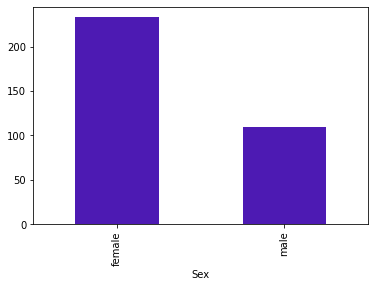

In [50]:
# 생존한 성별 인원 차이
titanic_df.groupby('Sex').sum()['Survived'].plot(kind='bar', color=[0.3, 0.1, 0.7])

In [52]:
titanic_df.groupby('Pclass').count()['Survived']

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [54]:
pclass_df = titanic_df.groupby('Pclass').sum()['Survived']

In [56]:
pclass_df

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

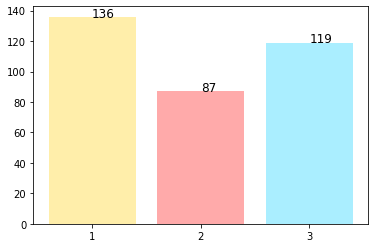

In [58]:
# 표로 구분
import matplotlib.pyplot as plt
x = pclass_df.index.astype(str)
y = pclass_df.values
plt.bar(x=x, height=y, color=['#fea', '#faa', '#aef'])
for idx in range(len(x)):
  plt.text(x[idx], y[idx], y[idx], size=12)
plt.show()

In [60]:
def age_change(age):
    if age >= 70:
        return '노인'
    elif age >= 10:
        return str(int(age//10)) + '0대'
    return '유아'

In [61]:
titanic_df['AgeRange'] = titanic_df['Age'].apply(age_change)

In [62]:
titanic_df.groupby('AgeRange').sum()['Survived']

AgeRange
10대     41
20대    129
30대     73
40대     34
50대     20
60대      6
노인       1
유아      38
Name: Survived, dtype: int64